# Importing and Querying Data with PostgreSQL (Northwind Database)

Describtion of the Northwind Database: https://en.wikiversity.org/wiki/Database_Examples/Northwind 

Example SQL-Queries based on the Northwind Database: https://www.w3schools.com/sql/default.asp

SQL Tutorials: https://www.youtube.com/watch?v=zpnHsWOy0RY&list=PLP9IO4UYNF0UQkBXlTMSw0CYsxv-GDkkI

## Frequently used SQL clauses (for in-depth learning)

<div>
  <style>
    .sql-keyword {
      color: blue;
    }
  </style>
  <span class="sql-keyword">SELECT</span><br>
  <span class="sql-keyword">SELECT DISTINCT</span><br>
  <span class="sql-keyword">FROM</span><br>
  <span class="sql-keyword">WHERE</span><br>
  <span class="sql-keyword">AND</span><br>
  <span class="sql-keyword">LIKE</span><br>
  <span class="sql-keyword">GROUP BY</span><br>
  <span class="sql-keyword">HAVING</span><br>
  <span class="sql-keyword">ORDER BY</span><br>
  <span class="sql-keyword">FULL JOIN</span><br>
  <span class="sql-keyword">INNER JOIN</span><br>
  <span class="sql-keyword">LEFT JOIN</span><br>
  <span class="sql-keyword">RIGHT JOIN</span><br>
  <span class="sql-keyword">ON</span><br>
  <span class="sql-keyword">LIMIT</span><br>
  <span class="sql-keyword">AS</span><br>
  <span class="sql-keyword">AVG</span><br>
  <span class="sql-keyword">COUNT</span><br>
  <span class="sql-keyword">MIN</span><br>
  <span class="sql-keyword">MAX</span><br>
  <span class="sql-keyword">SUM</span><br>
  <span class="sql-keyword">BETWEEN</span><br>
  <span class="sql-keyword">IN</span><br>
  <span class="sql-keyword">IS NULL</span><br>
  <span class="sql-keyword">IS NOT NULL</span><br> 
  <span class="sql-keyword">ROUND</span><br> 
  <span class="sql-keyword">CAST</span><br>
  <span class="sql-keyword">NUMERIC</span><br>
  <span class="sql-keyword">INTEGER</span>  
</div>

## Libraries and Settings

In [9]:
# Libraries
import os
import pandas as pd
from sqlalchemy import create_engine, text
import matplotlib.pyplot as plt

# Settings
import warnings
warnings.filterwarnings("ignore")

# Current working directory
print(os.getcwd())

/


## Read data from .csv files to separate data frames 

In [2]:
# Define path to data
path = 'workspace/Data/'

# Read data from .csv files
df_customers = pd.read_csv(f'{path}Customers.csv', sep=',')
df_categories = pd.read_csv(f'{path}Categories.csv', sep=',')
df_employees = pd.read_csv(f'{path}Employees.csv', sep=',')
df_order_details = pd.read_csv(f'{path}OrderDetails.csv', sep=',')
df_orders = pd.read_csv(f'{path}Orders.csv', sep=',')
df_products = pd.read_csv(f'{path}Products.csv', sep=',')
df_shippers = pd.read_csv(f'{path}Shippers.csv', sep=',')
df_suppliers = pd.read_csv(f'{path}Suppliers.csv', sep=',')

# Change column names to lowercase
df_customers.columns = df_customers.columns.str.lower()
df_categories.columns = df_categories.columns.str.lower()
df_employees.columns = df_employees.columns.str.lower()
df_order_details.columns = df_order_details.columns.str.lower()
df_orders.columns = df_orders.columns.str.lower()
df_products.columns = df_products.columns.str.lower()
df_shippers.columns = df_shippers.columns.str.lower()
df_suppliers.columns = df_suppliers.columns.str.lower()

# Print new lowercase column names
print("Lowercase Column Names:")
print(f"Customers: {df_customers.columns.tolist()}")
print(f"Categories: {df_categories.columns.tolist()}")
print(f"Employees: {df_employees.columns.tolist()}")
print(f"Order Details: {df_order_details.columns.tolist()}")
print(f"Orders: {df_orders.columns.tolist()}")
print(f"Products: {df_products.columns.tolist()}")
print(f"Shippers: {df_shippers.columns.tolist()}")
print(f"Suppliers: {df_suppliers.columns.tolist()}")

# Check dimensions of DataFrames
print("Dimensions of DataFrames:")
print(f"Customers: {df_customers.shape}")
print(f"Categories: {df_categories.shape}")
print(f"Employees: {df_employees.shape}")
print(f"OrderDetails: {df_order_details.shape}")
print(f"Orders: {df_orders.shape}")
print(f"Products: {df_products.shape}")
print(f"Shippers: {df_shippers.shape}")
print(f"Suppliers: {df_suppliers.shape}")


Lowercase Column Names:
Customers: ['customerid', 'customername', 'contactname', 'address', 'city', 'postalcode', 'country']
Categories: ['categoryid', 'categoryname', 'description']
Employees: ['employeeid', 'lastname', 'firstname', 'birthdate', 'photo', 'notes']
Order Details: ['orderdetailid', 'orderid', 'productid', 'quantity']
Orders: ['orderid', 'customerid', 'employeeid', 'orderdate', 'shipperid']
Products: ['productid', 'productname', 'supplierid', 'categoryid', 'unit', 'price']
Shippers: ['shipperid', 'shippername', 'phone']
Suppliers: ['supplierid', 'suppliername', 'contactname', 'address', 'city', 'postalcode', 'country', 'phone']
Dimensions of DataFrames:
Customers: (91, 7)
Categories: (8, 3)
Employees: (10, 6)
OrderDetails: (518, 4)
Orders: (196, 5)
Products: (77, 6)
Shippers: (3, 3)
Suppliers: (29, 8)


## Create database connection

In [3]:
# Set up database connection
user = "pgadmin"
password = "geheim"
host = "localhost"
port = "5432"
database = "northwind"

# Create Connection URL
db_connection_url = "postgresql://" + user + ":" + password +\
                    "@" + host + ":" + port + "/" + database

# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Test database connection
with engine.connect() as connection:
    result = connection.execute(text('SELECT current_database()'))
    print(result.fetchone())

# Dispose the engine
engine.dispose()

('northwind',)


## Write data frames to database tables

In [4]:
# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Drop tables if it exist
with engine.connect() as connection:
    connection.execute(text("DROP TABLE IF EXISTS public.categories CASCADE;"))
    connection.execute(text("DROP TABLE IF EXISTS public.customers CASCADE;"))
    connection.execute(text("DROP TABLE IF EXISTS public.employees CASCADE;"))
    connection.execute(text("DROP TABLE IF EXISTS public.orderdetails CASCADE;"))
    connection.execute(text("DROP TABLE IF EXISTS public.orders CASCADE;"))
    connection.execute(text("DROP TABLE IF EXISTS public.products CASCADE;"))
    connection.execute(text("DROP TABLE IF EXISTS public.shippers CASCADE;"))
    connection.execute(text("DROP TABLE IF EXISTS public.suppliers CASCADE;"))
    connection.commit()

# Write DataFrames to database
df_categories.to_sql('categories', engine)
df_customers.to_sql('customers', engine)
df_employees.to_sql('employees', engine)
df_order_details.to_sql('orderdetails', engine)
df_orders.to_sql('orders', engine)
df_products.to_sql('products', engine)
df_shippers.to_sql('shippers', engine)
df_suppliers.to_sql('suppliers', engine)

# Dispose the engine
engine.dispose()

## List tables in the database

In [5]:
# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Open a connection
with engine.connect() as connection:

    # Execute the query
    result = connection.execute(text("""SELECT table_name
                                        FROM information_schema.tables
                                        WHERE table_schema = 'public';"""))
    
    # Fetch and print the results
    for row in result:
        print(row[0])

# Dispose the engine
engine.dispose()

northwind_table
categories
customers
employees
orderdetails
orders
products
shippers
suppliers


## Create a SQL query to retrieve product information from a database.

In [6]:
# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Write data to table
df_sub = pd.read_sql_query('''SELECT 
    CustomerID, 
    COUNT(OrderID) AS OrderCount
FROM Orders
GROUP BY CustomerID
ORDER BY OrderCount DESC;''', 
                          con=engine)

# Dispose the engine
engine.dispose()

# Show the data
df_sub

,customerid,ordercount
0,20,10
1,65,7
2,63,7
3,87,7
4,37,6
...,...,...
69,70,1
70,90,1
71,31,1
72,27,1


## Solutions

In [ ]:
#1. What are the details of all customers whose country is 'Spain'?
#Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Write data to table
df_sub = pd.read_sql_query('''
                    SELECT 
    o.OrderID, 
    e.EmployeeID, 
    e.FirstName, 
    e.LastName
FROM Orders o
Left JOIN Employees e ON o.EmployeeID = e.EmployeeID;
                           ''', 
                          con=engine)

# Dispose the engine
engine.dispose()

# Show the data
df_sub


,orderid,employeeid,firstname,lastname
0,10248,5,Steven,Buchanan
1,10249,6,Michael,Suyama
2,10250,4,Margaret,Peacock
3,10251,3,Janet,Leverling
4,10252,4,Margaret,Peacock
...,...,...,...,...
191,10439,6,Michael,Suyama
192,10440,4,Margaret,Peacock
193,10441,3,Janet,Leverling
194,10442,3,Janet,Leverling


## Plot product prices

KeyError: 'price'

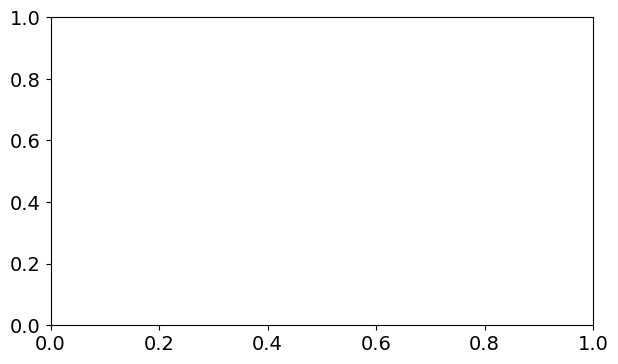

In [8]:
# Plot Histogram
fig = plt.figure( figsize=(7,4))
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
n, bins, patches = plt.hist(x=df_sub['price'], 
                            bins=20, 
                            color='#C53115',
                            alpha=1.00, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('Price (USD)', fontsize=10, labelpad=10)
plt.ylabel('Frequency', fontsize=10, labelpad=10)
plt.title('Histogram of product prices', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [9]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.8.0-1014-azure
Datetime: 2024-09-28 14:32:27
Python Version: 3.11.10
-----------------------------------
